In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [2]:
from PIL import Image
import glob
import random
import numpy as np
from scipy.misc import imresize

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


xs = []
ys = []

for filename in glob.glob('gauges/*.png'): #assuming gif
    im=Image.open(filename)
    # pull apart filename
    ys.append(float(filename.split('_')[1].split('.')[0])/360.0)
    # resize image
    #im.thumbnail((img_rows,img_cols), Image.ANTIALIAS)
    im=np.array(im)
    im=rgb2gray(im)
    im=imresize(im,(img_rows,img_cols))

    xs.append(im)
    
    
    
c = list(zip(xs, ys))
random.shuffle(c)
xs, ys = zip(*c)
xs=np.asarray(xs)
ys=np.asarray(ys)

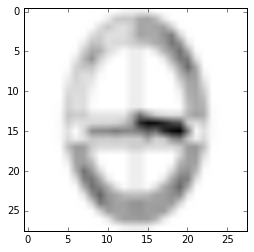

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xs[0],cmap='gray')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.1, random_state=42)

In [5]:


print(x_train.shape)

#if K.image_data_format() == 'channels_first':
#x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
#x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
#input_shape = (1, img_rows, img_cols)
#else:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(324, 28, 28)
x_train shape: (324, 28, 28, 1)
324 train samples
36 test samples


In [8]:
batch_size = 128
epochs = 34

model = Sequential()
model.add(Lambda(lambda x: x/127.5 - 1., input_shape=input_shape, output_shape=input_shape))
model.add(Conv2D(32, 3, 3, activation='relu'))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Activation('tanh'))
model.add(Dense(1, init = 'normal'))

#model.add(Dense(1, activation='softmax'))

model.compile(loss = 'mse', optimizer = 'Adam')

model.fit(x_train, y_train,
          batch_size=batch_size,
          nb_epoch=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 324 samples, validate on 36 samples
Epoch 1/34
324/324 [==============================] - 0s - loss: 0.2262 - val_loss: 0.2348
Epoch 2/34
324/324 [==============================] - 0s - loss: 0.1163 - val_loss: 0.0477
Epoch 3/34
324/324 [==============================] - 0s - loss: 0.0923 - val_loss: 0.0361
Epoch 4/34
324/324 [==============================] - 0s - loss: 0.0744 - val_loss: 0.0533
Epoch 5/34
324/324 [==============================] - 0s - loss: 0.0552 - val_loss: 0.0080
Epoch 6/34
324/324 [==============================] - 0s - loss: 0.0358 - val_loss: 0.0158
Epoch 7/34
324/324 [==============================] - 0s - loss: 0.0228 - val_loss: 0.0419
Epoch 8/34
324/324 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0446
Epoch 9/34
324/324 [==============================] - 0s - loss: 0.0156 - val_loss: 0.0545
Epoch 10/34
324/324 [==============================] - 0s - loss: 0.0160 - val_loss: 0.0385
Epoch 11/34
324/324 [=======================

In [9]:
for index in range(20):
    angle = float(model.predict(x_test[index][None, :, :, :], batch_size=1))
    print('====')
    print(angle*360)
    print(y_test[index]*360)

====
68.5360997915268
57.0
====
103.56791138648987
88.0
====
128.4508502483368
108.0
====
280.86835384368896
218.0
====
42.49604791402817
36.0
====
255.54701328277588
204.0
====
427.57673263549805
304.0
====
223.70200395584106
183.0
====
321.0753107070923
248.0
====
154.88483548164368
130.0
====
88.86513590812683
74.0
====
237.3833727836609
196.0
====
34.51724320650101
29.0
====
234.6128010749817
188.0
====
121.97423815727234
103.0
====
197.89524793624878
161.0
====
258.241024017334
206.0
====
10.025552809238434
15.0
====
299.3795442581177
236.0
====
25.260784327983856
24.0
